In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.layers import *
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## 1. Loading Data

#### 1.1 Defining Required Dataset Paths 

In [2]:
BASE_FOLDER_PATH = "Dataset/AnimalDataset/"
DATA_PATH = BASE_FOLDER_PATH + "All_Images/"
TRAIN_PATH = BASE_FOLDER_PATH + "Train_Images/"
VALID_PATH = BASE_FOLDER_PATH + "Validation_Images/"

#### 1.2 Checking The Total Number Of Images In Dataset Of Each Class

In [3]:
folders = os.listdir(DATA_PATH)
for f in folders:
    path = DATA_PATH + f
    print(str(len(os.listdir(path))) + " Images For " + str(f).upper() + " Class")

202 Images For CATS Class
202 Images For DOGS Class
202 Images For HORSES Class
202 Images For HUMANS Class


 - **We Need To Split Our Data Into Separate Folders For Training And Validation So That We Can Make Training And Validation Generators Later**

#### 1.3 Creating Training and Validation Images Directory If Not Available

In [4]:
if not os.path.isdir(TRAIN_PATH):
    os.mkdir(TRAIN_PATH)
    
if not os.path.isdir(VALID_PATH):
    os.mkdir(VALID_PATH)

#### 1.4 Creating Subfolders For Each Class In Both Training and Validation Images Directory 

In [5]:
classes = ["dogs", "cats", "horses", "humans"]

for each_class in classes:
    sub_path_train = os.path.join(TRAIN_PATH, each_class)
    sub_path_valid = os.path.join(VALID_PATH, each_class)
    
    if not os.path.isdir(sub_path_train):
        os.mkdir(sub_path_train)
        
    if not os.path.isdir(sub_path_valid):
        os.mkdir(sub_path_valid)

#### 1.5 Splitting The Data And Copying It To The Created Directories

In [6]:
SPLIT = 0.9

for classSubFolder in os.listdir(DATA_PATH):
    
    # Iterating Over Each Class Folder     
    cur_class_path = DATA_PATH + classSubFolder
    images_cur_class = os.listdir(cur_class_path)
    
    # Splitting The Data Into Train And Validation Images For Current Class
    split_size = int(SPLIT*len(images_cur_class))
    train_images = images_cur_class[:split_size]
    valid_images = images_cur_class[split_size:]
    print("\n# Training Images For " + str(classSubFolder).upper() + " : " + str(len(train_images)))
    print("Validation Images For " + str(classSubFolder).upper() + " : " + str(len(valid_images)))
    
    # Copying Training Images
    for image_path in train_images:
        src_path = os.path.join(cur_class_path, image_path)
        dest_path = os.path.join(TRAIN_PATH + classSubFolder, image_path)
        shutil.copy(src_path, dest_path)
        
    # Copying Validation Images    
    for image_path in valid_images:
        src_path = os.path.join(cur_class_path, image_path)
        dest_path = os.path.join(VALID_PATH + classSubFolder, image_path)
        shutil.copy(src_path, dest_path)


# Training Images For CATS : 181
Validation Images For CATS : 21

# Training Images For DOGS : 181
Validation Images For DOGS : 21

# Training Images For HORSES : 181
Validation Images For HORSES : 21

# Training Images For HUMANS : 181
Validation Images For HUMANS : 21


## 2. Creating Training And Validation Generators

 - A Image Data Generator First Goes To The Base Directory Specified
 - Then It Reads Images According To The Subfolders Name As Classes.
 - Then It Convert Images Into Arrays And Apply Required Operations.
 - It Also Converts The Class Labels Into One Hot Vectors.
 - Thus This Can Be Used To Easily Feed The Data To Any Model.
 - This Helps To Load Large Datasets In Form Of Small Batches.
 - These Batches Can Be Feed One By One To The Model

#### 2.1 Training Generator

In [7]:
train_gen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 724 images belonging to 4 classes.


#### 2.2 Validation Generator

In [8]:
val_gen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = val_gen.flow_from_directory(
    VALID_PATH,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 84 images belonging to 4 classes.


## 3. Visualising The Data

#### 3.1 Visualising The Training Images


Shape Of X_Train (For 1 Batch) :  (32, 150, 150, 3)

Shape Of Y_Train (For 1 Batch) :  (32, 4)

One Batch Of Training Images


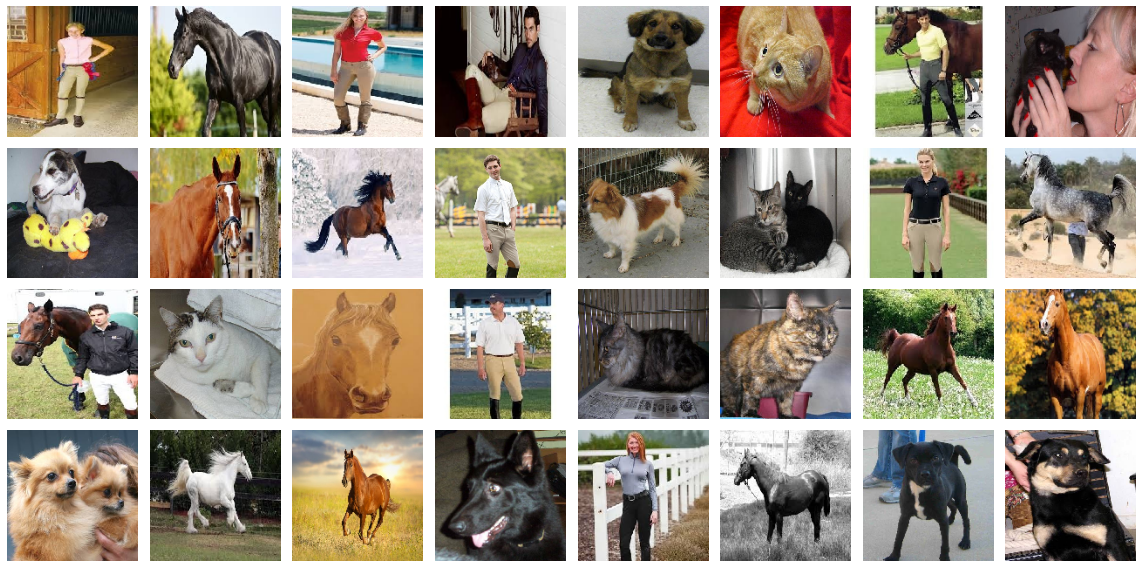

In [9]:
for x, y in train_generator:
    print("\nShape Of X_Train (For 1 Batch) : ", x.shape)
    print("\nShape Of Y_Train (For 1 Batch) : ", y.shape)
    plt.figure(figsize=(16,8))
    for i in range(1, len(x)+1):
        plt.subplot(4,8,i)
        plt.imshow(x[i-1])
        plt.axis("off")
    plt.tight_layout()
    print("\nOne Batch Of Training Images")
    plt.show()
    break

#### 3.1 Visualising The Validation Images


Shape Of X_Validation (For 1 Batch) :  (16, 150, 150, 3)

Shape Of Y_Validation (For 1 Batch) :  (16, 4)

One Batch Of Validation Images


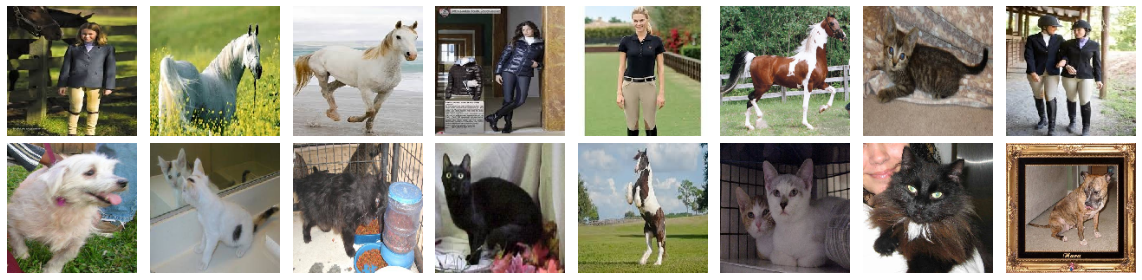

In [10]:
for x, y in validation_generator:
    print("\nShape Of X_Validation (For 1 Batch) : ", x.shape)
    print("\nShape Of Y_Validation (For 1 Batch) : ", y.shape)
    plt.figure(figsize=(16,4))
    for i in range(1, len(x)+1):
        plt.subplot(2,8,i)
        plt.imshow(x[i-1])
        plt.axis("off")
    plt.tight_layout()
    print("\nOne Batch Of Validation Images")
    plt.show()
    break
# Mini Batch of 32 images

## 4. Defining The CNN Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)      

## 5. Compiling The Model

In [12]:
adam = optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training The Model

- Training The Model Using Train And Validation Generator.
- **model.fit( )** -> Useful When Dataset Is Small And It Can Fit Inside The Memory.
- **model.fit_generator( )** -> Useful When The Dataset Is Large And Can't Fit Inside The Memory.

In [13]:
print("The Labels We Got : ", set(train_generator.labels))

The Labels We Got :  {0, 1, 2, 3}


In [14]:
history = model.fit_generator(
    train_generator,
    epochs = 60,
    steps_per_epoch = 7, # Batchs Per Epoch
    validation_data=validation_generator,
    validation_steps = 4  
)

Epoch 1/60
7/7 [==============================] - 14s 2s/step - loss: 1.3868 - accuracy: 0.2589 - val_loss: 1.3771 - val_accuracy: 0.2656
Epoch 2/60
7/7 [==============================] - 12s 2s/step - loss: 1.3921 - accuracy: 0.2277 - val_loss: 1.3897 - val_accuracy: 0.2115
Epoch 3/60
7/7 [==============================] - 12s 2s/step - loss: 1.3781 - accuracy: 0.2547 - val_loss: 1.3842 - val_accuracy: 0.3269
Epoch 4/60
7/7 [==============================] - 12s 2s/step - loss: 1.3749 - accuracy: 0.3036 - val_loss: 1.3699 - val_accuracy: 0.2969
Epoch 5/60
7/7 [==============================] - 12s 2s/step - loss: 1.3681 - accuracy: 0.3259 - val_loss: 1.3791 - val_accuracy: 0.3846
Epoch 6/60
7/7 [==============================] - 12s 2s/step - loss: 1.3708 - accuracy: 0.3304 - val_loss: 1.3237 - val_accuracy: 0.3654
Epoch 7/60
7/7 [==============================] - 7s 982ms/step - loss: 1.3509 - accuracy: 0.4198 - val_loss: 1.3134 - val_accuracy: 0.4062
Epoch 8/60
7/7 [================

7/7 [==============================] - 13s 2s/step - loss: 0.7521 - accuracy: 0.6920 - val_loss: 0.9202 - val_accuracy: 0.6346
Epoch 60/60
7/7 [==============================] - 12s 2s/step - loss: 0.7986 - accuracy: 0.6557 - val_loss: 0.7161 - val_accuracy: 0.6346


## 7. Visualising The Results

#### 7.1 Training And Validation Accuracy

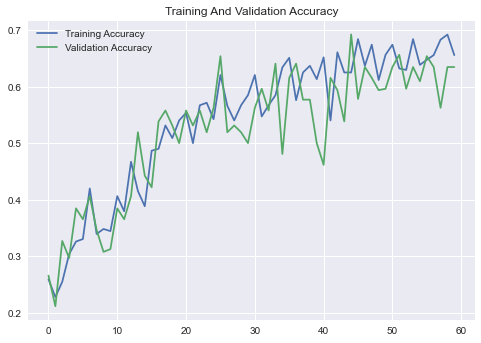

In [15]:
train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

plt.style.use("seaborn")
plt.plot(train_acc, label="Training Accuracy")
plt.plot(valid_acc, label="Validation Accuracy")
plt.title("Training And Validation Accuracy")
plt.legend()
plt.show()

#### 7.2 Training And Validation Loss

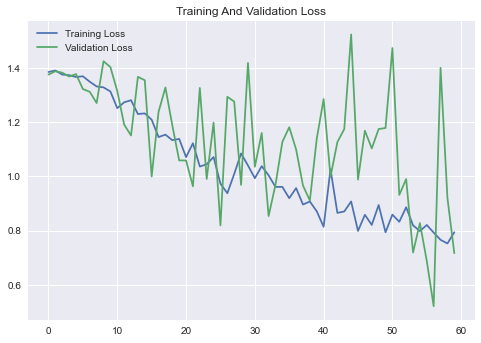

In [16]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

plt.style.use("seaborn")
plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.title("Training And Validation Loss")
plt.legend()
plt.show()

## 8. Results

#### 8.1 Training Accuracy

In [17]:
train_loss, train_accuracy = model.evaluate_generator(train_generator)
print("\nTraining Accuracy : ", round(100*train_accuracy, 4), "%")


Training Accuracy :  70.442 %


#### 8.2 Validation Accuracy

In [18]:
valid_loss, valid_accuracy = model.evaluate_generator(validation_generator)
print("\nValidation Accuracy : ", round(100*valid_accuracy, 4), "%")


Validation Accuracy :  63.0952 %


# Data Augmentation In Image Pipelines

 - **We Can See That The Model Is Overfitting And Their Is A Lot Of Inconsistency In Training And Validation Accuracies And Losses.**
 
 - **This Is Due To The Small Quantity Of Dataset.**
 
 - **So, We Will Use The Regularization Technique Known As Data Augmentation.**
 
 - **This Will Help Us Create Different Images With Different Operations Applied To Them.**
 
 - **This Should Help To Reduce Overfitting By Making The Model More Robust.**

## 9. Creating Training And Validation Generators With Data Augmentation

#### 9.1 Training Image Generator

In [19]:
train_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
)

train_generator_aug = train_image_gen.flow_from_directory(
    TRAIN_PATH,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 724 images belonging to 4 classes.


#### 9.2 Validation Image Generator

 - No Augmentation Is Done On Validation Data 

In [20]:
val_image_gen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator_aug = val_image_gen.flow_from_directory(
    VALID_PATH,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 84 images belonging to 4 classes.


## 10. Visualising The Augmented Data

 - Only Training Data Is Augmented, So, We Will Visualise That Only. 


Shape Of X_Train (For 1 Batch) :  (32, 150, 150, 3)

Shape Of Y_Train (For 1 Batch) :  (32, 4)

One Batch Of Augmented Training Images


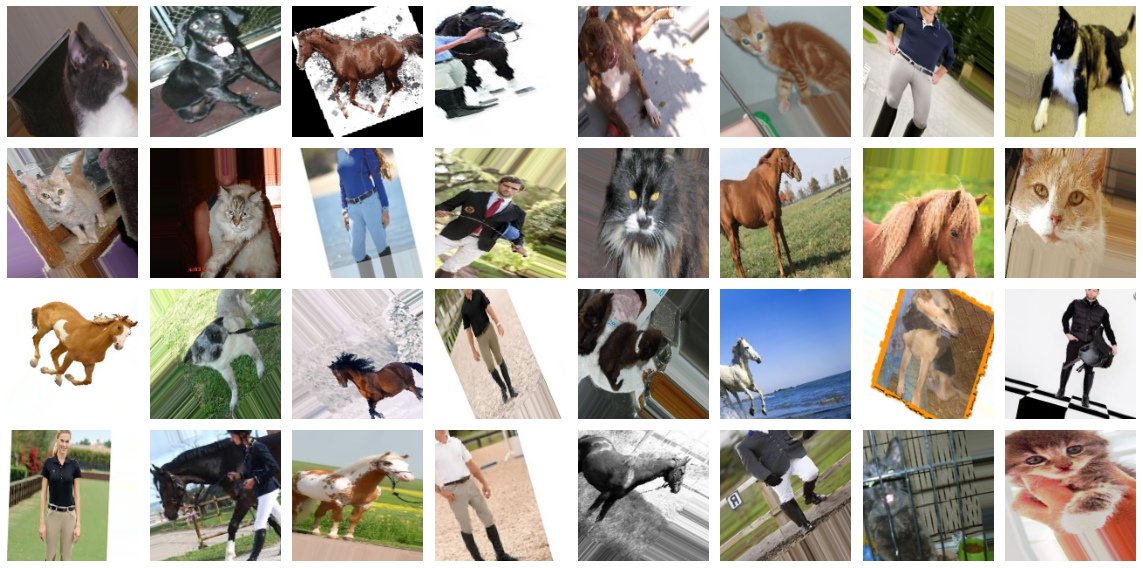

In [21]:
for x, y in train_generator_aug:
    print("\nShape Of X_Train (For 1 Batch) : ", x.shape)
    print("\nShape Of Y_Train (For 1 Batch) : ", y.shape)
    plt.figure(figsize=(16,8))
    for i in range(1, len(x)+1):
        plt.subplot(4,8,i)
        plt.imshow(x[i-1])
        plt.axis("off")
    plt.tight_layout()
    print("\nOne Batch Of Augmented Training Images")
    plt.show()
    break

## 11. Defining New CNN Model For Augmented Data

In [22]:
model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model_aug.add(MaxPool2D((2,2)))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPool2D((2,2)))
model_aug.add(Conv2D(128, (3,3), activation='relu'))
model_aug.add(Dropout(0.25))
model_aug.add(MaxPool2D((2,2)))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPool2D((2,2)))
model_aug.add(Conv2D(16, (3,3), activation='relu'))
model_aug.add(Flatten())
model_aug.add(Dense(64, activation='relu'))
model_aug.add(Dense(4, activation='softmax'))
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)      

## 12. Compiling And Training The New CNN Model

In [23]:
adam = optimizers.adam(lr=1e-4)
model_aug.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model_aug.fit_generator(
    train_generator_aug,
    epochs = 60,
    steps_per_epoch = 7,
    validation_data=validation_generator_aug,
    validation_steps = 4  
)

Epoch 1/60
7/7 [==============================] - 15s 2s/step - loss: 1.3886 - accuracy: 0.2812 - val_loss: 1.3962 - val_accuracy: 0.2656
Epoch 2/60
7/7 [==============================] - 12s 2s/step - loss: 1.3867 - accuracy: 0.2589 - val_loss: 1.3903 - val_accuracy: 0.2115
Epoch 3/60
7/7 [==============================] - 9s 1s/step - loss: 1.3894 - accuracy: 0.2547 - val_loss: 1.3657 - val_accuracy: 0.2308
Epoch 4/60
7/7 [==============================] - 12s 2s/step - loss: 1.3825 - accuracy: 0.3571 - val_loss: 1.3905 - val_accuracy: 0.3438
Epoch 5/60
7/7 [==============================] - 11s 2s/step - loss: 1.3840 - accuracy: 0.2812 - val_loss: 1.3753 - val_accuracy: 0.3077
Epoch 6/60
7/7 [==============================] - 12s 2s/step - loss: 1.3850 - accuracy: 0.2679 - val_loss: 1.3893 - val_accuracy: 0.3077
Epoch 7/60
7/7 [==============================] - 11s 2s/step - loss: 1.3803 - accuracy: 0.3208 - val_loss: 1.3772 - val_accuracy: 0.3594
Epoch 8/60
7/7 [===================

7/7 [==============================] - 11s 2s/step - loss: 1.0709 - accuracy: 0.5377 - val_loss: 1.3229 - val_accuracy: 0.6154


## 13. Visualising The Results Generated By The Model With Data Augmentation

#### 13.1 Training And Validation Accuracy


Training Accuracy :  57.0442 %

Validation Accuracy :  60.7143 %


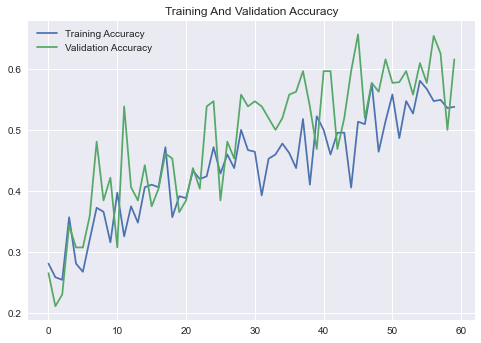

In [24]:
train_loss, train_accuracy = model_aug.evaluate_generator(train_generator_aug)
print("\nTraining Accuracy : ", round(100 * train_accuracy, 4), "%")

valid_loss, valid_accuracy = model_aug.evaluate_generator(validation_generator_aug)
print("\nValidation Accuracy : ", round(100 * valid_accuracy, 4), "%")

train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

plt.style.use("seaborn")
plt.plot(train_acc, label="Training Accuracy")
plt.plot(valid_acc, label="Validation Accuracy")
plt.title("Training And Validation Accuracy")
plt.legend()
plt.show()

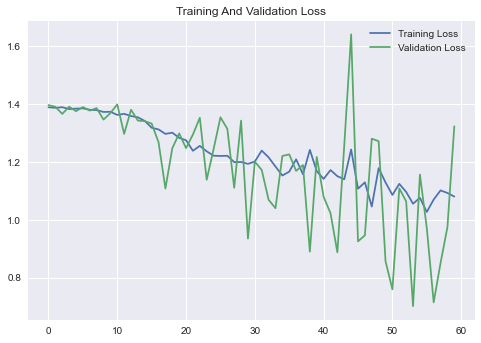

In [25]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

plt.style.use("seaborn")
plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.title("Training And Validation Loss")
plt.legend()
plt.show()

**Although There Is Not Any Improvement In The Accuracy But Data Augmentation Helped Us In Reducing The Overfitting. It's Clearly Visible That The Model Got Rid Of Overfitting.**